 ## Part 2 

Use the global powerplants data and make a global map. Use the appropriate visualization method for your map to explore interesting aspects of the data. Alternatively, you may use the airport dataset from the tutorial, but your map must be significantly different, 
focusing on new aspects of the data or using a distinct cartographic approach. 
If you come across other interesting global data, you can use it but remember to mention the source.

When making the map, keep the following points in mind:

-Good choice of colors
-Visual hierarchy
-Use of suitable projection
-Use of map elements which are necessary for the map
-Map layout

In [1]:
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

In [2]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
energydata = pd.read_csv(DATA_DIRECTORY / "global_power_plant_database.csv", delimiter=',')
energydata.head()

/tmp/ipykernel_118/1193470528.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  energydata = pd.read_csv(DATA_DIRECTORY / "global_power_plant_database.csv", delimiter=',')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [4]:
len(energydata)

34936

In [5]:
# Create Point geometries from longitude and latitude
# The zip() function in Python combines multiple iterables (like lists or columns) into tuples, pairing elements by their positions.

energy_geometry = [Point(xy) for xy in zip(energydata['longitude'], 
                                            energydata['latitude'])]

# Create a GeoDataFrame from the airports data
energy_geodata = gpd.GeoDataFrame(energydata, 
                                   crs="EPSG:4326", 
                                   geometry=energy_geometry)

In [6]:
energy_geodata.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (65.11900 32.32200)
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,POINT (65.79500 31.67000)
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,POINT (65.79200 31.62300)
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (69.47870 34.55600)
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (69.71700 34.64100)


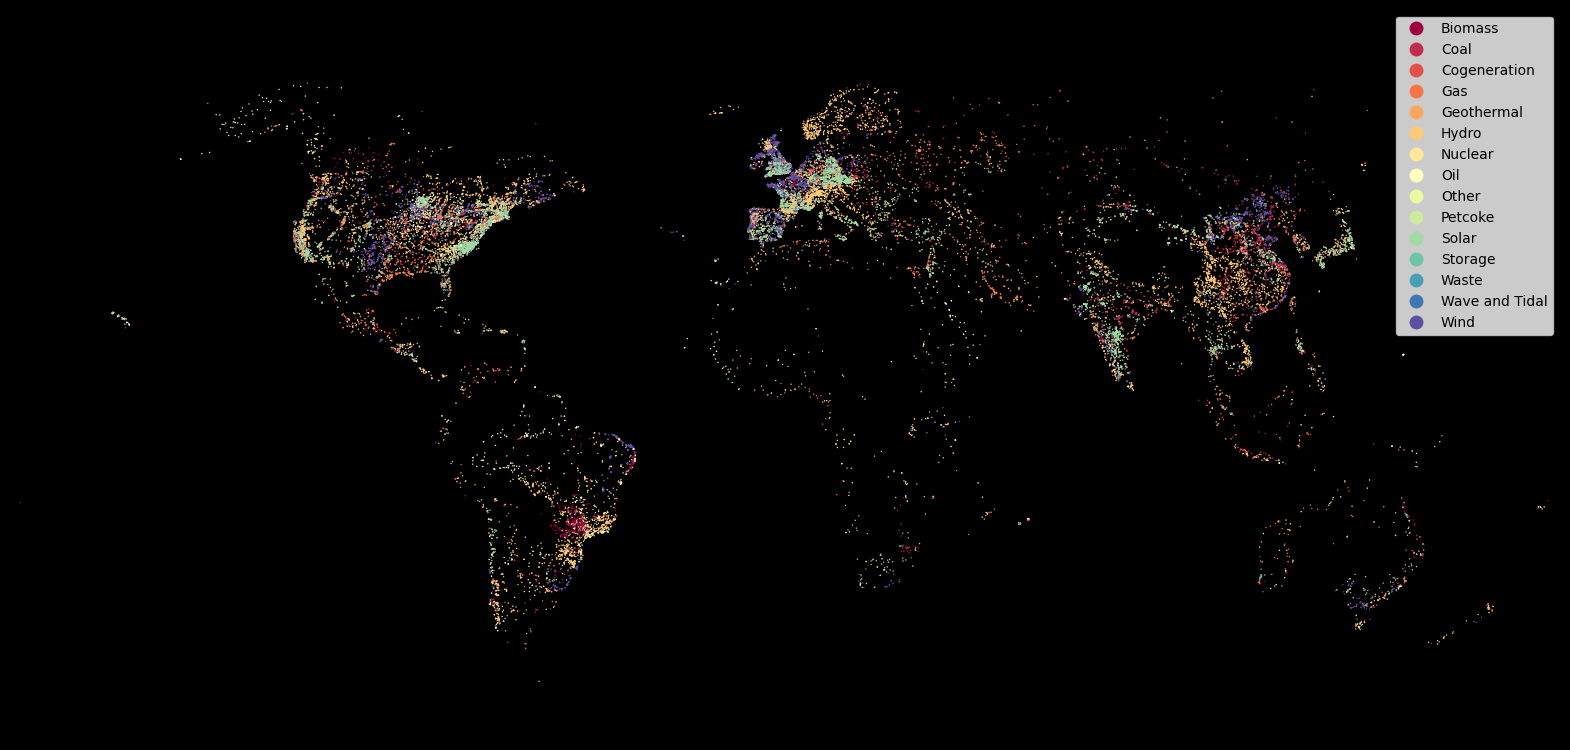

In [7]:
# plot of our data
fig, ax = plt.subplots(facecolor='black', 
                       subplot_kw={'projection': ccrs.Robinson()}, 
                       figsize=(20,20))
ax.patch.set_facecolor('black')

energy_geodata.plot(ax=ax, column="primary_fuel", cmap="Spectral", transform=ccrs.PlateCarree(), 
                     markersize=1, alpha=1, legend=True,
                     edgecolors='none')
ax.set_ylim(-7000000, 9000000)
plt.show()

#color='crimson'

# !!!!
# with cartopy
# projection= sets how the map is displayed, e.g., ccrs.Robinson().
# transform= tells Cartopy the CRS of your data, usually ccrs.PlateCarree() for lat/lon.

In [8]:
energy_geodata.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017',
       'geometry'],
      dtype='object')

In [9]:
# electricity generation in gigawatt-hours reported for the year 2019

In [10]:
energy_geodata["primary_fuel"].unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [11]:
energy_geodata["estimated_generation_gwh_2013"].head()

0    123.77
1     18.43
2     18.64
3    225.06
4    406.16
Name: estimated_generation_gwh_2013, dtype: float64

In [12]:
# markersize for generation

# Calculate marker size 
energy_geodata['markersize'] = energy_geodata['estimated_generation_gwh_2013'] / 15  # Scale down the count for a suitable marker size

In [64]:
# custom cmap
import matplotlib.colors as mcolors
# 15 colours

my_cmap = mcolors.ListedColormap(["#58D68D", "#EC7063", "#AF7AC5", "#A569BD", "#DC7633", "#5DADE2", "#48C9B0", "#45B39D", "#AAB7B8",
                                  "#CD6155", "#F4D03F", "#F5B041", "#EB984E", "#5499C7", "#F0F3F4"]) 



my2_cmap = mcolors.ListedColormap(["#52BE80", "#CD6155", "#D6EAF8", "#F2D7D5", "#FCF3CF", "#5DADE2", "#A569BD", "#922B21", "#AAB7B8",
                                   "#6C3483", "#F4D03F", "#B7950B", "#E8DAEF", "#2874A6", "#F0F3F4"])


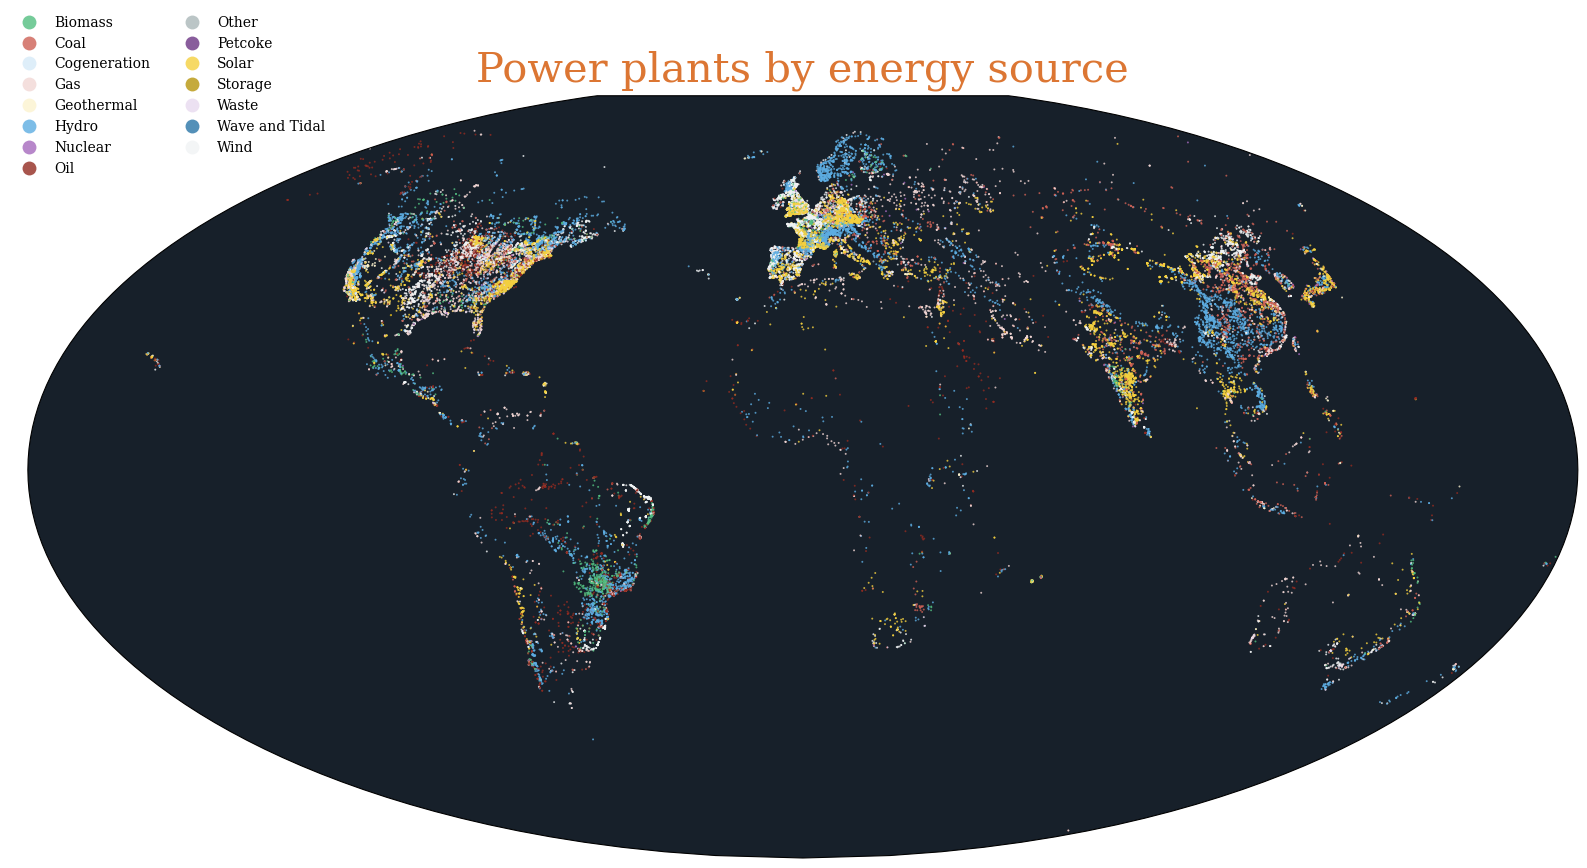

In [69]:
import numpy as np
import matplotlib.font_manager as fm

# Initialize a figure with a Robinson projection and set the figure size and background color
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mollweide()}, figsize=(20, 20))
ax.patch.set_facecolor('#17202A')

custom_font = fm.FontProperties(family='serif', weight='normal', size=10)


# Plot energy with adjusted marker size and colormap
scatter = energy_geodata.plot(ax=ax, transform=ccrs.PlateCarree(), markersize=2, #energy_geodata['markersize']
                              alpha=0.8, column=energy_geodata['primary_fuel'], cmap=my2_cmap, legend=True, legend_kwds={"loc": "center right", "frameon" : False, "fancybox" : False, "prop": custom_font, "ncol" : 2, 'bbox_to_anchor': (0.2, 1)}, edgecolors='none')



# Above: This says “my data is in PlateCarree (lat/lon), please transform it to the map's projection.” 

# Add a title to the map
ax.set_title("Power plants by energy source", fontsize=30, color='#DC7633', loc='center', pad=10, fontweight='normal', family='serif')


# estimated electricity generation in gigawatt-hours for the year 2013

plt.savefig("power_plants.png", dpi=300, bbox_inches='tight')
plt.show()

Text(0.5, 1.0, 'Power Plant')

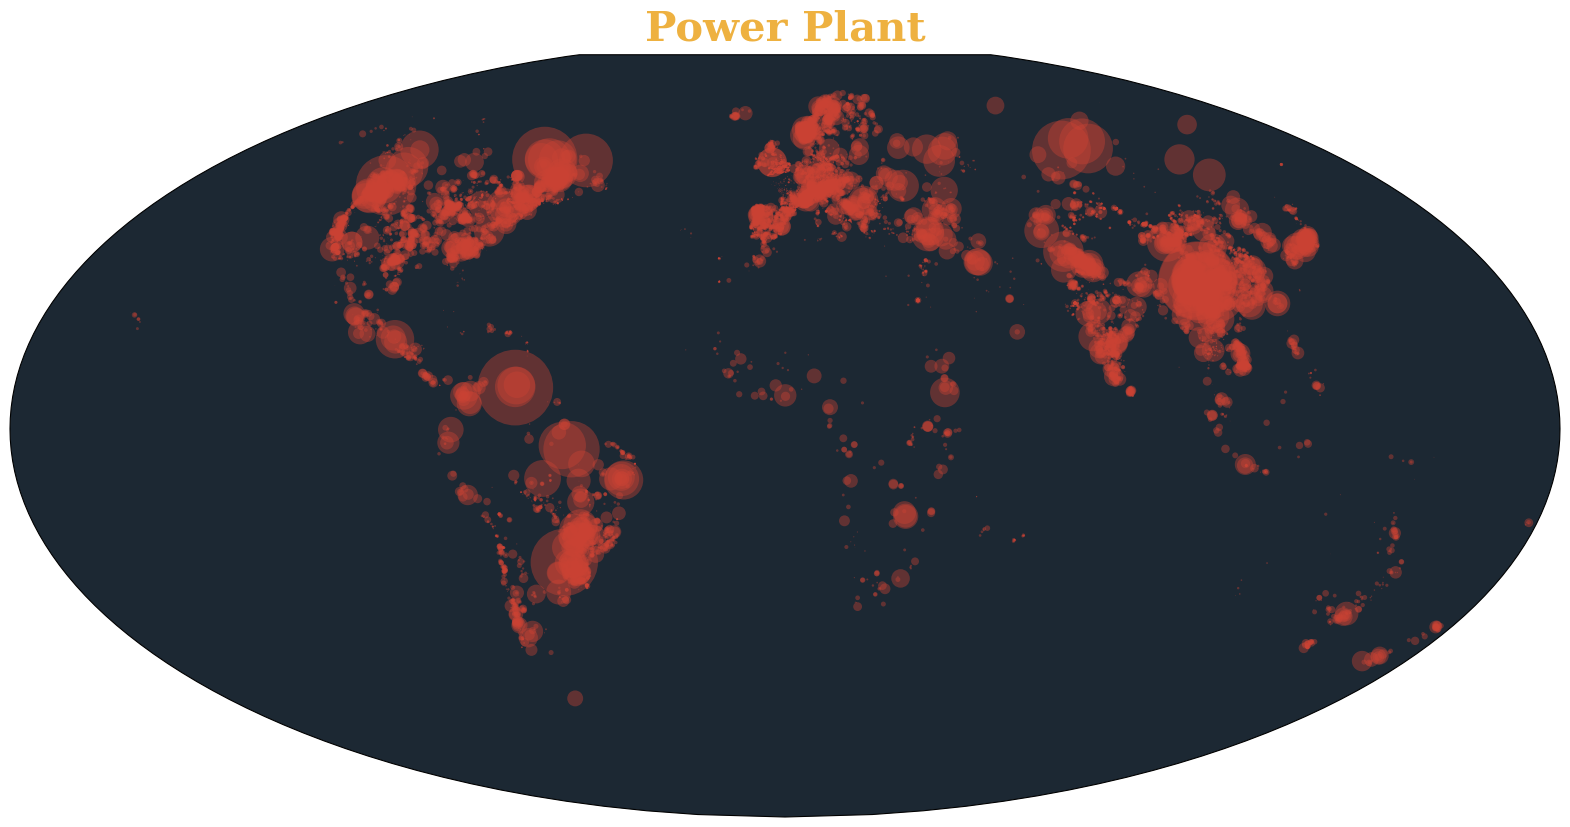

In [49]:


# Initialize a figure with a Robinson projection and set the figure size and background color
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mollweide()}, figsize=(20, 20))
ax.patch.set_facecolor('#1C2833')

custom_font = fm.FontProperties(family='serif', weight='normal', size=10)


# Plot energy with adjusted marker size and colormap
scatter = energy_geodata.plot(ax=ax, transform=ccrs.PlateCarree(), markersize=energy_geodata['markersize'],
                              alpha=0.4, color="#CB4335", legend=True, legend_kwds={"loc": "center right", "frameon" : False, "fancybox" : False, "prop": custom_font, "ncol" : 2, 'bbox_to_anchor': (0.2, 1)}, edgecolors='none')



# Above: This says “my data is in PlateCarree (lat/lon), please transform it to the map's projection.” 

# Add a title to the map
ax.set_title("Power Plant", fontsize=30, color='#EEB140', loc='center', pad=10, fontweight='bold', family='serif')


# estimated electricity generation in gigawatt-hours for the year 2013

# "#CACFD2"

# Biomass, Coal, Cogeneration, Gas, Geothermal, Hydro, Nuclear, Oil, Other, Petcoke, Solar, Storage, Waste, Wave and Tidal, Wind

4:
--#F9EBEA, #F4ECF7, --#EBF5FB, ---#FEF9E7
1. 1,4,6, 11


5:
5. --#CD6155, --#A569BD, --#5DADE2, --#52BE80, ---#F4D03F

4:
--#922B21, --#6C3483, --#2874A6, --#B7950B

3. alhaalta. 

+ valkonen (tuuli)
+ harmaa (muut)